## Importing the Libraries

In [1]:
#For analysis
import numpy as np
import pandas as pd
#For visualization 
import matplotlib.pyplot as plt
import seaborn as sns
#For building models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#Importing warnings
import warnings
warnings.filterwarnings('ignore')

## Step 1: Reading and Understanding the Data

## Loading the Dataset

In [2]:
leads = pd.read_csv('leads.csv')

## Reading and Understanding the Data

In [3]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
leads.shape

(9240, 37)

In [5]:
leads.info() #Checking the columns and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
leads.describe() # Check the summary of the dataset

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
leads.drop_duplicates().shape #NoDuplicates

(9240, 37)

Looks like there are quite a few categorical variables present in this dataset for which we will need to create dummy variables. Also, there are a lot of null values present as well, so we will need to treat them accordingly.

## Step 2: Data Cleaning and Preparation

In [8]:
missing_values = 100*leads.isnull().mean() #Check the number of missing values in each column
missing_values

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [9]:
missing_values=missing_values[missing_values.values>=30]
more_than_30 =list(missing_values.index)
leads.drop(labels=more_than_30,axis=1,inplace=True) #Dropping columns with more than 30% Missing Values

In [10]:
leads.shape #Checking shape after dropping them

(9240, 31)

The variable 'City' and 'Country' won't be of any use in our analysis. So it's best that we drop it.

In [11]:
leads.drop(['City','Country'], axis = 1, inplace = True)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,Potential Lead,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,Select,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,Select,No,No,Modified


There are a few columns in which there is a level called 'Select' which basically means that the student had not selected the option for that particular column which is why it shows 'Select'. These values are as good as missing values and hence we need to identify the value counts of the level 'Select' in all the columns that it is present.

In [12]:
for column in leads:
    print(leads[column].astype('category').value_counts())
    print('___________________________________________________') #Getting the value counts of all the columns

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
___________________________________________________
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
___________________________________________________
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
__________________

The following three columns now have the level 'Select'. Let's check them once again.

In [13]:
leads['Lead Profile'].astype('category').value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [14]:
leads['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [15]:
leads['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [16]:
leads.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True) #Dropping columns with a lot of missing values

In [17]:
leads.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses',
            'Update me on Supply Chain Content', 'Get updates on DM Content',
            'I agree to pay the amount through cheque'], axis = 1, inplace = True) #Dropping columns with only one value or more than 99% in one value

In [18]:
leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [19]:
leads.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True) #Drop the column because it has a lot of entries under just one value

In [20]:
missing_values = 100*leads.isnull().mean() #Check the number of missing values in each column
missing_values

Prospect ID                                0.000000
Lead Number                                0.000000
Lead Origin                                0.000000
Lead Source                                0.389610
Do Not Email                               0.000000
Converted                                  0.000000
TotalVisits                                1.482684
Total Time Spent on Website                0.000000
Page Views Per Visit                       1.482684
Last Activity                              1.114719
Specialization                            15.562771
What is your current occupation           29.112554
A free copy of Mastering The Interview     0.000000
Last Notable Activity                      0.000000
dtype: float64

In [21]:
leads = leads[~pd.isnull(leads['What is your current occupation'])]

In [22]:
missing_values = 100*leads.isnull().mean() #Check the number of missing values in each column
missing_values

Prospect ID                               0.000000
Lead Number                               0.000000
Lead Origin                               0.000000
Lead Source                               0.549618
Do Not Email                              0.000000
Converted                                 0.000000
TotalVisits                               1.984733
Total Time Spent on Website               0.000000
Page Views Per Visit                      1.984733
Last Activity                             1.572519
Specialization                            0.274809
What is your current occupation           0.000000
A free copy of Mastering The Interview    0.000000
Last Notable Activity                     0.000000
dtype: float64

In [23]:
leads = leads[~pd.isnull(leads['Lead Source'])]
leads = leads[~pd.isnull(leads['TotalVisits'])]
leads = leads[~pd.isnull(leads['Page Views Per Visit'])]
leads = leads[~pd.isnull(leads['Last Activity'])]
leads = leads[~pd.isnull(leads['Specialization'])] #Removing the null value rows in the other columns

In [24]:
missing_values = 100*leads.isnull().mean() #Check the number of missing values in each column
missing_values

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [25]:
print(len(leads.index))
print(len(leads.index)/9240) #Checking the percentage of rows retained

6373
0.6897186147186147


In [26]:
leads.head() #Looking at the dataset again

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


In [27]:
leads.drop(['Prospect ID', 'Lead Number'], 1, inplace = True) #Removing unnecessary columns

In [28]:
leads.shape

(6373, 12)

In [29]:
leads.info() #Checking for columns with categorical variables

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6373 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6373 non-null   object 
 1   Lead Source                             6373 non-null   object 
 2   Do Not Email                            6373 non-null   object 
 3   Converted                               6373 non-null   int64  
 4   TotalVisits                             6373 non-null   float64
 5   Total Time Spent on Website             6373 non-null   int64  
 6   Page Views Per Visit                    6373 non-null   float64
 7   Last Activity                           6373 non-null   object 
 8   Specialization                          6373 non-null   object 
 9   What is your current occupation         6373 non-null   object 
 10  A free copy of Mastering The Interview  6373 non-null   obje

In [30]:
# Create dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview',
                              'Last Notable Activity']], drop_first=True)

# Add the results to the master dataframe
leads = pd.concat([leads, dummy], axis=1)

In [31]:
# Creating dummy variable separately for the variable 'Specialization' since it has the level 'Select' which is useless so we
# drop that level by specifying it explicitly

dummy_spl = pd.get_dummies(leads['Specialization'], prefix = 'Specialization')
dummy_spl = dummy_spl.drop(['Specialization_Select'], 1)
leads = pd.concat([leads, dummy_spl], axis = 1)

In [32]:
# Drop the variables for which the dummy variables have been created

leads = leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)

In [33]:
# Let's take a look at the dataset again

leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Test-Train Split


In [34]:
# Putting feature variable to X
X = leads.drop(['Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
# Putting target variable to y
y = leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [36]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [37]:
# Scale the three numeric features present in the dataset

scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
8003,0.015936,0.029489,0.125,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
218,0.015936,0.082306,0.250,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4171,0.023904,0.034331,0.375,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4037,0.000000,0.000000,0.000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3660,0.000000,0.000000,0.000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
# Checking the Lead Conversion rate
Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

48.093519535540565

## Step 3: Model Building


In [39]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
print("Training Accuracy")
print(logreg.score(X_train,y_train))
print("Testing Accuracy")
print(logreg.score(X_test,y_test))

predicted = logreg.predict(X_test)
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))

Training Accuracy
0.8004931629679444
Testing Accuracy
0.5271966527196653
[[139 857]
 [ 47 869]]
              precision    recall  f1-score   support

           0       0.75      0.14      0.24       996
           1       0.50      0.95      0.66       916

    accuracy                           0.53      1912
   macro avg       0.63      0.54      0.45      1912
weighted avg       0.63      0.53      0.44      1912



In [40]:
logreg.predict_proba(X_test)

array([[0.00281689, 0.99718311],
       [0.        , 1.        ],
       [0.        , 1.        ],
       ...,
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ]])

In [41]:
#Feature Selection using RFE
logreg = LogisticRegression()
rfe = RFE(estimator=logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [42]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 23),
 ('Lead Origin_Landing Page Submission', False, 8),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 52),
 ('Lead Source_Direct Traffic', False, 24),
 ('Lead Source_Facebook', False, 51),
 ('Lead Source_Google', False, 36),
 ('Lead Source_Live Chat', False, 44),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 35),
 ('Lead Source_Pay per Click Ads', False, 43),
 ('Lead Source_Press_Release', False, 53),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 37),
 ('Lead Source_Social Media', False, 58),
 ('Lead Source_WeLearn', False, 42),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 33),
 ('Lead Source_testone', False, 38),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 25),
 ('Last Activity_Email Bounced', False, 4),
 ('Last Activity_Email Link C

In [43]:
col = X_train.columns[rfe.support_]
print(col)

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Had a Phone Conversation',
       'Last Activity_SMS Sent', 'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')


In [44]:
# Select only the columns selected by RFE

X_train = X_train[col]

### Model 1

In [45]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2072.8
Date:                Tue, 17 Oct 2023   Deviance:                       4145.5
Time:                        02:58:40   Pearson chi2:                 4.84e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3660
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0061      0.600     -1.677      0.094      -2.182       0.170
TotalVisits                                             11.3439      2.682      4.230      0.000       6.088      16.600
Total Time Spent on Website                              4.4312      0.185     23.924      0.000       4.068       4.794
Lead Origin_Lead Add Form                                2.9483      1.191      2.475      0.013       0.614       5.283
Lead Source_Olark Chat                                   1.4584      0.122     11.962      0.000       1.219       1.697
Lead Source_Reference                                    1.2994      1.214      1.070      0.285      -1.080       3.679
Lead Source_Welingak Website                             3.4159      1.558      2.192      0.028       0.362       6.470
Do Not Email_Yes                                        -1.5053      0.193     -7.781      0.000      -1.884      -1.126
Last Activity_Had a Phone Conversation                   1.0397      0.983      1.058      0.290      -0.887       2.966
Last Activity_SMS Sent                                   1.1827      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Housewife               22.6492   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1544      0.630     -1.831      0.067      -2.390       0.081
What is your current occupation_Unemployed              -1.3395      0.594     -2.254      0.024      -2.505      -0.175
What is your current occupation_Working Professional     1.2743      0.623      2.045      0.041       0.053       2.496
Last Notable Activity_Had a Phone Conversation          23.1932   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Unreachable                        2.7868      0.807      3.453      0.001       1.205       4.369
========================================================================================================================
"""

In [46]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,84.19
4,Lead Source_Reference,65.18
5,Lead Source_Welingak Website,20.03
11,What is your current occupation_Unemployed,3.65
7,Last Activity_Had a Phone Conversation,2.44
13,Last Notable Activity_Had a Phone Conversation,2.43
1,Total Time Spent on Website,2.38
0,TotalVisits,1.62
8,Last Activity_SMS Sent,1.59
12,What is your current occupation_Working Profes...,1.56


In [47]:
X_train.drop('Lead Source_Reference', axis = 1, inplace = True) #Dropping columns with a high VIF and high P value

### Model 2

In [48]:
# Refit the model with the new set of features

logm2 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2073.2
Date:                Tue, 17 Oct 2023   Deviance:                       4146.5
Time:                        02:58:40   Pearson chi2:                 4.82e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3658
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0057      0.600     -1.677      0.094      -2.181       0.170
TotalVisits                                             11.3428      2.682      4.229      0.000       6.086      16.599
Total Time Spent on Website                              4.4312      0.185     23.924      0.000       4.068       4.794
Lead Origin_Lead Add Form                                4.2084      0.259     16.277      0.000       3.702       4.715
Lead Source_Olark Chat                                   1.4583      0.122     11.960      0.000       1.219       1.697
Lead Source_Welingak Website                             2.1557      1.037      2.079      0.038       0.124       4.188
Do Not Email_Yes                                        -1.5036      0.193     -7.779      0.000      -1.882      -1.125
Last Activity_Had a Phone Conversation                   1.0398      0.983      1.058      0.290      -0.887       2.966
Last Activity_SMS Sent                                   1.1827      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Housewife               22.6511   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1537      0.630     -1.830      0.067      -2.389       0.082
What is your current occupation_Unemployed              -1.3401      0.594     -2.255      0.024      -2.505      -0.175
What is your current occupation_Working Professional     1.2748      0.623      2.046      0.041       0.053       2.496
Last Notable Activity_Had a Phone Conversation          23.1934   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Unreachable                        2.7872      0.807      3.454      0.001       1.205       4.369
========================================================================================================================
"""

In [49]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,3.65
6,Last Activity_Had a Phone Conversation,2.44
12,Last Notable Activity_Had a Phone Conversation,2.43
1,Total Time Spent on Website,2.38
2,Lead Origin_Lead Add Form,1.71
0,TotalVisits,1.62
7,Last Activity_SMS Sent,1.59
11,What is your current occupation_Working Profes...,1.56
3,Lead Source_Olark Chat,1.44
4,Lead Source_Welingak Website,1.33


In [50]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True) #Dropping columns with a high P value

### Model 3

In [51]:
# Refit the model with the new set of features

logm3 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2076.1
Date:                Tue, 17 Oct 2023   Deviance:                       4152.2
Time:                        02:58:40   Pearson chi2:                 4.82e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3650
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0069      0.600     -1.679      0.093      -2.182       0.168
TotalVisits                                             11.4551      2.686      4.265      0.000       6.191      16.720
Total Time Spent on Website                              4.4237      0.185     23.900      0.000       4.061       4.787
Lead Origin_Lead Add Form                                4.2082      0.259     16.276      0.000       3.701       4.715
Lead Source_Olark Chat                                   1.4581      0.122     11.958      0.000       1.219       1.697
Lead Source_Welingak Website                             2.1557      1.037      2.079      0.038       0.124       4.188
Do Not Email_Yes                                        -1.5037      0.193     -7.780      0.000      -1.882      -1.125
Last Activity_Had a Phone Conversation                   2.7502      0.802      3.430      0.001       1.179       4.322
Last Activity_SMS Sent                                   1.1826      0.082     14.364      0.000       1.021       1.344
What is your current occupation_Housewife               21.6525   1.49e+04      0.001      0.999   -2.91e+04    2.91e+04
What is your current occupation_Student                 -1.1520      0.630     -1.828      0.068      -2.387       0.083
What is your current occupation_Unemployed              -1.3385      0.594     -2.253      0.024      -2.503      -0.174
What is your current occupation_Working Professional     1.2743      0.623      2.045      0.041       0.053       2.495
Last Notable Activity_Unreachable                        2.7862      0.807      3.453      0.001       1.205       4.368
========================================================================================================================
"""

In [52]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,3.65
1,Total Time Spent on Website,2.38
2,Lead Origin_Lead Add Form,1.71
0,TotalVisits,1.62
7,Last Activity_SMS Sent,1.59
11,What is your current occupation_Working Profes...,1.56
3,Lead Source_Olark Chat,1.44
4,Lead Source_Welingak Website,1.33
5,Do Not Email_Yes,1.09
9,What is your current occupation_Student,1.09


In [53]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True) #Dropping columns with a high P value

### Model 4

In [54]:
# Refit the model with the new set of features

logm4 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2078.3
Date:                Tue, 17 Oct 2023   Deviance:                       4156.7
Time:                        02:58:40   Pearson chi2:                 4.83e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3644
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4528      0.554     -0.818      0.413      -1.538       0.632
TotalVisits                                             11.2586      2.672      4.214      0.000       6.023      16.495
Total Time Spent on Website                              4.4217      0.185     23.898      0.000       4.059       4.784
Lead Origin_Lead Add Form                                4.2057      0.258     16.274      0.000       3.699       4.712
Lead Source_Olark Chat                                   1.4530      0.122     11.930      0.000       1.214       1.692
Lead Source_Welingak Website                             2.1541      1.037      2.078      0.038       0.122       4.186
Do Not Email_Yes                                        -1.5063      0.193     -7.785      0.000      -1.886      -1.127
Last Activity_Had a Phone Conversation                   2.7515      0.802      3.432      0.001       1.180       4.323
Last Activity_SMS Sent                                   1.1823      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Student                 -1.7017      0.588     -2.893      0.004      -2.855      -0.549
What is your current occupation_Unemployed              -1.8879      0.550     -3.435      0.001      -2.965      -0.811
What is your current occupation_Working Professional     0.7246      0.581      1.248      0.212      -0.413       1.862
Last Notable Activity_Unreachable                        2.7834      0.807      3.448      0.001       1.201       4.365
========================================================================================================================
"""

In [55]:
X_train.drop('What is your current occupation_Working Professional', axis = 1, inplace = True)

### Model 5

In [56]:
# Refit the model with the new set of features

logm5 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2079.1
Date:                Tue, 17 Oct 2023   Deviance:                       4158.1
Time:                        02:58:40   Pearson chi2:                 4.80e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3642
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.2040      0.196      1.043      0.297      -0.179       0.587
TotalVisits                                   11.1489      2.665      4.184      0.000       5.926      16.371
Total Time Spent on Website                    4.4223      0.185     23.899      0.000       4.060       4.785
Lead Origin_Lead Add Form                      4.2051      0.258     16.275      0.000       3.699       4.712
Lead Source_Olark Chat                         1.4526      0.122     11.934      0.000       1.214       1.691
Lead Source_Welingak Website                   2.1526      1.037      2.076      0.038       0.121       4.185
Do Not Email_Yes                              -1.5037      0.193     -7.774      0.000      -1.883      -1.125
Last Activity_Had a Phone Conversation         2.7552      0.802      3.438      0.001       1.184       4.326
Last Activity_SMS Sent                         1.1856      0.082     14.421      0.000       1.024       1.347
What is your current occupation_Student       -2.3578      0.281     -8.392      0.000      -2.908      -1.807
What is your current occupation_Unemployed    -2.5445      0.186    -13.699      0.000      -2.908      -2.180
Last Notable Activity_Unreachable              2.7846      0.807      3.449      0.001       1.202       4.367
==============================================================================================================
"""

In [57]:
X_train.drop('Lead Source_Welingak Website', axis = 1, inplace = True)

### Model 6

In [58]:
# Refit the model with the new set of features

logm6 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4450
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2083.1
Date:                Tue, 17 Oct 2023   Deviance:                       4166.1
Time:                        02:58:40   Pearson chi2:                 5.01e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3630
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.1952      0.196      0.998      0.319      -0.188       0.579
TotalVisits                                   11.1485      2.666      4.182      0.000       5.924      16.373
Total Time Spent on Website                    4.4222      0.185     23.898      0.000       4.060       4.785
Lead Origin_Lead Add Form                      4.5265      0.249     18.157      0.000       4.038       5.015
Lead Source_Olark Chat                         1.4529      0.122     11.935      0.000       1.214       1.692
Do Not Email_Yes                              -1.4929      0.192     -7.773      0.000      -1.869      -1.116
Last Activity_Had a Phone Conversation         2.7565      0.801      3.439      0.001       1.186       4.327
Last Activity_SMS Sent                         1.1893      0.082     14.478      0.000       1.028       1.350
What is your current occupation_Student       -2.3575      0.282     -8.369      0.000      -2.910      -1.805
What is your current occupation_Unemployed    -2.5368      0.186    -13.642      0.000      -2.901      -2.172
Last Notable Activity_Unreachable              2.7839      0.808      3.447      0.001       1.201       4.367
==============================================================================================================
"""

In [59]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,What is your current occupation_Unemployed,2.80
1,Total Time Spent on Website,1.99
0,TotalVisits,1.54
6,Last Activity_SMS Sent,1.51
3,Lead Source_Olark Chat,1.33
2,Lead Origin_Lead Add Form,1.19
4,Do Not Email_Yes,1.08
7,What is your current occupation_Student,1.06
5,Last Activity_Had a Phone Conversation,1.01
9,Last Notable Activity_Unreachable,1.01


Since the P values of all variables is close 0 and VIF values are low for all the variables, Model 6 is our final model. We have 10 variables in our final model.

## Step 3: Model Evaluation


In [60]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

8003    0.300657
218     0.141863
4171    0.127502
4037    0.291393
3660    0.966890
207     0.194246
2044    0.177906
6411    0.949033
6498    0.076151
2085    0.898890
dtype: float64

In [61]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.30065706, 0.14186277, 0.12750206, 0.29139259, 0.96689002,
       0.19424564, 0.1779058 , 0.9490331 , 0.07615133, 0.8988899 ])

In [62]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.300657
1,0,0.141863
2,1,0.127502
3,1,0.291393
4,1,0.966890


In [63]:
# Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.300657,0
1,0,0.141863,0
2,1,0.127502,0
3,1,0.291393,0
4,1,0.966890,1


In [64]:
# Create confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1929  383]
 [ 560 1589]]


In [65]:
# The confusion matrix indicates as below
# Predicted     not_converted    converted
# Actual
# not_converted        1929      383
# converted            560       1589  

In [66]:
# Let's check the overall accuracy

print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

Accuracy : 0.7886124187401928


In [67]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [68]:
# Calculate the sensitivity

print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.739413680781759


In [69]:
# Calculate the specificity

print("Specificity : ",TN / float(TN+FP))

Specificity :  0.8343425605536332


In [70]:
# Calculate false postive rate - predicting converted lead when the lead actually was not converted
print("False Positive Rate :",FP/ float(TN+FP))

False Positive Rate : 0.1656574394463668


In [71]:
# positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.8057809330628803


In [72]:
# Negative predictive value
print ("Negative predictive value :",TN / float(TN+ FN))

Negative predictive value : 0.7750100441944556


We found out that our specificity was good (~83%) but our sensitivity was only 73%. Hence, this needed to be taken care of.
We have got sensitivity of 73% and this was mainly because of the cut-off point of 0.5 that we had arbitrarily chosen. Now, this cut-off point had to be optimised in order to get a decent value of sensitivity and for this we will use the ROC curve.

### Plotting the ROC Curve

In [73]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [74]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

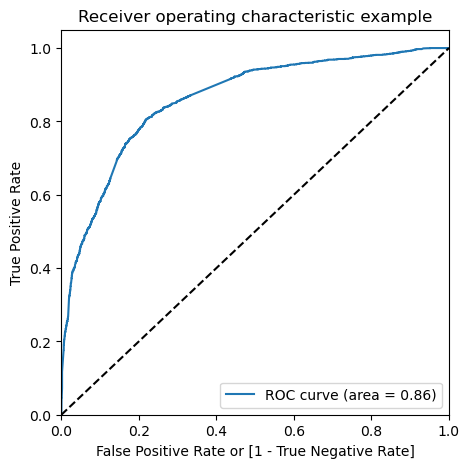

In [75]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

Since we have higher (0.86) area under the ROC curve , therefore our model is a good one.

### Finding Optimal Cutoff Point

In [76]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.300657,0,1,1,1,1,0,0,0,0,0,0
1,0,0.141863,0,1,1,0,0,0,0,0,0,0,0
2,1,0.127502,0,1,1,0,0,0,0,0,0,0,0
3,1,0.291393,0,1,1,1,0,0,0,0,0,0,0
4,1,0.966890,1,1,1,1,1,1,1,1,1,1,1


In [77]:
# Calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.481731  1.000000  0.000000
0.1   0.1  0.526564  0.994416  0.091696
0.2   0.2  0.698498  0.944160  0.470156
0.3   0.3  0.767541  0.865984  0.676038
0.4   0.4  0.791527  0.810610  0.773789
0.5   0.5  0.788612  0.739414  0.834343
0.6   0.6  0.757229  0.624011  0.881055
0.7   0.7  0.735485  0.544439  0.913062
0.8   0.8  0.711275  0.452769  0.951557
0.9   0.9  0.637301  0.265240  0.983131


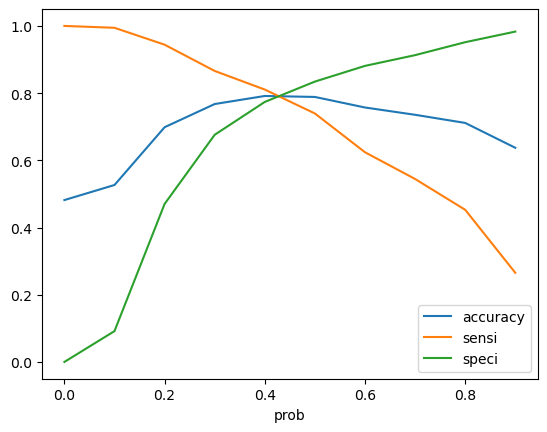

In [78]:
#Plotting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()


From the curve above, 0.4 is the optimum point to take it as a cutoff probability.

In [79]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.300657,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.141863,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.127502,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.291393,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.966890,1,1,1,1,1,1,1,1,1,1,1,1


### Assigning Lead Score to the Training Data

In [80]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Conversion_Prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.300657,0,1,1,1,1,0,0,0,0,0,0,0,30
1,0,0.141863,0,1,1,0,0,0,0,0,0,0,0,0,14
2,1,0.127502,0,1,1,0,0,0,0,0,0,0,0,0,13
3,1,0.291393,0,1,1,1,0,0,0,0,0,0,0,0,29
4,1,0.966890,1,1,1,1,1,1,1,1,1,1,1,1,97


In [81]:
# Checking the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy : 0.7915265635507733


In [82]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1789,  523],
       [ 407, 1742]])

In [83]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [84]:
# Sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.8106095858538855


In [85]:
# Specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.7737889273356401


In [86]:
# Calculate false postive rate - predicting converted lead when the lead was actually not have converted
print("False Positive rate : ",FP/ float(TN+FP))

False Positive rate :  0.22621107266435986


In [87]:
# Positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7690949227373068


In [88]:
# Negative predictive value
print("Negative Predictive Value : ",TN / float(TN+ FN))

Negative Predictive Value :  0.8146630236794171


### Precision and Recall

In [89]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[1929,  383],
       [ 560, 1589]])

In [90]:
# Precision

print("Precision :",precision_score(y_train_pred_final.Converted , y_train_pred_final.Predicted))

Precision : 0.8057809330628803


In [91]:
# Recall
print("Recall :",recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

Recall : 0.739413680781759


### Precision and recall tradeoff

In [92]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4456    1
 4457    0
 4458    0
 4459    0
 4460    0
 Name: Converted, Length: 4461, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 4456    1
 4457    1
 4458    1
 4459    0
 4460    0
 Name: Predicted, Length: 4461, dtype: int64)

In [93]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

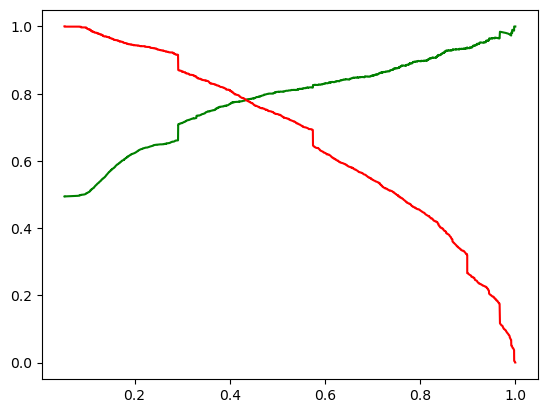

In [94]:
# plotting a trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Step 4: Making Predictions on the Test Set


In [95]:
# Scale the test set as well using just 'transform'

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [96]:
X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
4771,0.000000,0.000000,1,0,1,0,0,0,1,0,0,0,1,0,0
6122,0.027888,0.029049,0,0,0,0,0,0,0,0,0,1,0,0,0
9202,0.015936,0.416813,0,0,0,0,0,0,1,0,0,1,0,0,0
6570,0.011952,0.378961,0,0,0,0,1,0,1,0,0,1,0,0,0
2668,0.031873,0.395246,0,0,0,0,0,0,1,0,0,1,0,0,0


In [97]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
4771,1.0,0.000000,0.000000,1,0,1,0,0,0,1,0,0,0,1,0,0
6122,1.0,0.027888,0.029049,0,0,0,0,0,0,0,0,0,1,0,0,0
9202,1.0,0.015936,0.416813,0,0,0,0,0,0,1,0,0,1,0,0,0
6570,1.0,0.011952,0.378961,0,0,0,0,1,0,1,0,0,1,0,0,0
2668,1.0,0.031873,0.395246,0,0,0,0,0,0,1,0,0,1,0,0,0


In [98]:
# Drop the required columns from X_test as well

X_test.drop(['Lead Source_Reference', 'What is your current occupation_Housewife',
             'What is your current occupation_Working Professional', 'Last Notable Activity_Had a Phone Conversation','Lead Source_Welingak Website'], 1, inplace = True)

In [99]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [100]:
y_test_pred[:10]

4771    0.997298
6122    0.129863
9202    0.704465
6570    0.302359
2668    0.721305
4233    0.793232
3368    0.703788
9091    0.464227
5972    0.283500
3631    0.786883
dtype: float64

In [101]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [102]:
# Let's see the head

y_pred_1.head()

,0
4771,0.997298
6122,0.129863
9202,0.704465
6570,0.302359
2668,0.721305


In [103]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [104]:
# Remove index for both dataframes to append them side by side

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [105]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [106]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,1,0.997298
1,0,0.129863
2,0,0.704465
3,1,0.302359
4,1,0.721305


In [107]:
# Rename the column

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [108]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.997298
1,0,0.129863
2,0,0.704465
3,1,0.302359
4,1,0.721305


In [109]:
# Make predictions on the test set using 0.4 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.4 else 0)

In [110]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.997298,1
1,0,0.129863,0
2,0,0.704465,1
3,1,0.302359,0
4,1,0.721305,1


In [111]:
# Let's check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Accuracy : 0.7819037656903766


In [112]:
# Making the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[766, 230],
       [187, 729]])

In [113]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [114]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.7958515283842795


In [115]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.7690763052208835


In [116]:
#Assigning Lead Score to the Testing data¶
y_pred_final['Lead_Score'] = y_pred_final.Conversion_Prob.map( lambda x: round(x*100))

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted,Lead_Score
0,1,0.997298,1,100
1,0,0.129863,0,13
2,0,0.704465,1,70
3,1,0.302359,0,30
4,1,0.721305,1,72


#### Observations:
After running the model on the Test Data , we obtain:

Accuracy - 78.1%

Sensitivity - 79.6%

Specificity - 76.9%

#### Results :
1) Comparing the values obtained for Train & Test:

Train Data

Accuracy - 78.9%

Sensitivity - 73.9%

Specificity - 83.4%


Test Data

Accuracy - 78.1%

Sensitivity - 79.6%

Specificity - 76.9%

Thus we have achieved our goal of getting a ballpark of the target lead conversion rate to be around 77% . The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model to get a higher lead conversion rate of 77%.

Finding out the leads which should be contacted:

The customers which should be contacted are the customers whose "Lead Score" is equal to or greater than 77. They can be termed as 'Hot Leads'.

In [117]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=77]
hot_leads

,Converted,Conversion_Prob,final_predicted,Lead_Score
0,1,0.997298,1,100
5,1,0.793232,1,79
9,1,0.786883,1,79
10,1,0.991179,1,99
14,1,0.875852,1,88
...,...,...,...,...
1894,1,0.776363,1,78
1904,1,0.920446,1,92
1905,1,0.973823,1,97
1906,1,0.898890,1,90


So there are 497 leads which can be contacted and have a high chance of getting converted.

Finding out the Important Features from our final model:

In [118]:
res.params.sort_values(ascending=False)

TotalVisits                                   11.148455
Lead Origin_Lead Add Form                      4.526494
Total Time Spent on Website                    4.422193
Last Notable Activity_Unreachable              2.783944
Last Activity_Had a Phone Conversation         2.756502
Lead Source_Olark Chat                         1.452913
Last Activity_SMS Sent                         1.189299
const                                          0.195239
Do Not Email_Yes                              -1.492936
What is your current occupation_Student       -2.357475
What is your current occupation_Unemployed    -2.536782
dtype: float64